In [ ]:
# create animation

# convert int to a string of fixed lenght
def int2str(num, length=4):
    return str(num).zfill(length)

# load gt particles
original_data_particles_path = os.path.join("/home/stefano/Data/fluid_sym_data/", scene["name"], "frames")
print(original_data_particles_path)
# iterate over all files in folder
list_files = os.listdir(original_data_particles_path)
list_files = sorted(list_files)
deg_step = 360 / len(list_files)
azimuth_deg = 0
for i, filename in enumerate(list_files):
    if filename.endswith(".dat"):
        points_3d = load_particles_fluidsym(os.path.join(original_data_particles_path, filename))
        fig = plot_cameras(cameras, points=points_3d, azimuth_deg=azimuth_deg, elevation_deg=10, up="y")
        # save fig to file
        fig.savefig(os.path.join("plots", f"{scene['dataset']}-{scene['name']}-{int2str(i)}.png"), bbox_inches='tight', pad_inches=0)
        # save memory
        plt.close(fig)
        azimuth_deg += deg_step

/home/stefano/Data/fluid_sym_data/duck2/frames


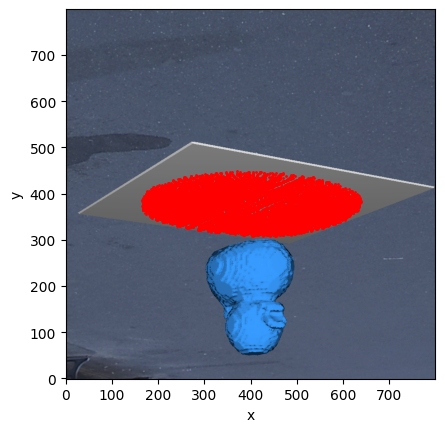

In [ ]:
camera_idx = 5
points_2d = project_points_3d_to_2d(points=points_3d, camera=cameras[camera_idx])
fig = plt.figure()
# flip image vertically for visualization
plt.imshow(np.fliplr(cameras[camera_idx].img), origin='lower')
# plt.imshow(cameras[0].img)
# visualize 2d points
plt.scatter(points_2d[:, 0], points_2d[:, 1], s=1, c='r')
# axis equal
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
width = 800
fov_x_deg = 20 # degrees
fov_x_rad = fov_x_deg * np.pi / 180
focal_x = width / (2 * np.tan(fov_x_rad / 2))
print(focal_x)

2268.5127278470836


In [ ]:
# # check

# k = intrinsics[0]
# r = poses_all[0, :3, :3]
# t = poses_all[0, :3, 3]
# print("intrinsics: ", k)
# print("rotation: ", r)
# print("translation: ", t)
# print("Rt", Rt_all[0])

# k = cameras[0].intrinsics
# r = cameras[0].pose[:3, :3]
# t = cameras[0].pose[:3, 3]
# print("camera intrinsics: ", k)
# print("camera rotation: ", r)
# print("camera translation: ", t)
# print("camera Rt", cameras[0].get_Rt())

# # print("intrinsics", k)
# # print("rotation", r)
# # print("translation", t)

# Bounding Box

In [ ]:
# FluidSym

points_all = []

# load particles
original_data_particles_path = os.path.join("/home/stefano/Data/fluid_sym_data/", scene["name"], "frames")
print(original_data_particles_path)
# iterate over all files in folder
for filename in os.listdir(original_data_particles_path):
    if filename.endswith(".dat"):
        points_3d = load_particles_fluidsym(os.path.join(original_data_particles_path, filename))
        outliers_mask = (np.abs(points_3d) > 1).any(axis=1)
        points_3d = points_3d[~outliers_mask]
        points_all.append(points_3d)
points_all = np.concatenate(points_all, axis=0)

print("bb_min", np.min(points_all, axis=0))
print("bb_max", np.max(points_all, axis=0))

/home/stefano/Data/fluid_sym_data/ball2/frames


bb_min [-0.91796875  0.02555525 -0.27862144]
bb_max [0.27922416 0.98046875 0.91796875]


In [ ]:
# # PAC-NeRF

# points_all = []

# # load particles
# particles_path = os.path.join("debug", "particles", "pacnerf", scene['name'])
# # iterate over all files in folder
# for filename in os.listdir(particles_path):
#     if filename.endswith(".ply"):
#         points_3d = load_particles_pacnerf(os.path.join(particles_path, filename))
#         points_all.append(points_3d)
# points_all = np.concatenate(points_all, axis=0)

# print("bb_min", np.min(points_all, axis=0))
# print("bb_max", np.max(points_all, axis=0))

In [ ]:
# same scene config file 
xyz_min=[-0.4, 0.1, -0.4],
xyz_max=[0.4, 1.0, 0.4],